# Objective 2.1 - Compare distributions across gender & race
Compare distributions of key health outcomes, lifestyle behaviors, and socioeconomic factors across gender and racial/ethnic groups.

- Health outcomes: bmi, systolic_avg, diastolic_avg, total_cholesterol
- Lifestyle: diet_score or diet_category, activity_level, sleep_avg_hr or sleep_category
- Socioeconomic: poverty_income_ratio  or pir_category, education_level, has_health_insurance 

across gender and race_ethnicity


## Step 1: Import and Set Up

***Setting Up the Python Environment for Data Analysis***

I imported libraries for data handling (pandas, numpy), visualization (matplotlib, seaborn, plotly), and weighted statistics (DescrStatsW). I also included tools to manage file paths and customize plot formatting. Next, I added the project root folder to Python’s path so I can import custom modules from the scripts directory. Then, I imported important project folder paths and utility functions for data exploration and formatting. To improve readability, I set pandas to display all columns when printing dataframes.

With this setup, the environment is ready for analysis and visualization.

In [1]:
# Setup environment and imports
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import matplotlib.ticker as mtick
from statsmodels.stats.weightstats import DescrStatsW
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

# --- Add project root (parent of 'scripts') to sys.path ---
current_dir = Path().resolve()
project_root = current_dir.parent
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))

from scripts.config import (
    FINAL_DATA_DIR,
    SUMMARY_DIR,
    PLOTS_DIR   
)
from scripts.utils import pretty_path, explore_data

# Display full columns in pandas
pd.set_option('display.max_columns', None)

print("Setup complete.")


Setup complete.


## STEP 2: Load the complete merged NHANES Dataset

***Loading the NHANES Data into Python***

Here, I’m loading the main dataset from a CSV file named “final_merged_nhanes_dataset.csv” located in my data folder. Before loading, I check to make sure the file actually exists—if it doesn’t, the code will stop and let me know.

Once the file is loaded, I take a quick look at the first few rows to get a feel for the data, and then I print the overall size of the dataset—how many rows and columns it has.

In [2]:
# Read the csv file into the dataframe

file_path = FINAL_DATA_DIR / "final_merged_nhanes_dataset.csv"
if not file_path.exists():
    raise FileNotFoundError(f"File not found: {file_path}")
df = pd.read_csv(file_path)

# preview the first few rows of a DataFrame.
display(df.head())
display(df.shape)

,participant_id,age,gender,race_ethnicity,education_level,poverty_income_ratio,pir_category,interview_sample_weight,psu,strata,has_health_insurance,sleep_avg_hr,sleep_category,activity_level,total_weekly_min,hei_score,diet_score_category,total_diet_weight,food_item_weight,bmi,obese,systolic_avg,diastolic_avg,bp_category,total_cholesterol,blood_drawn_sample_weight,cholesterol_category,fasting_glucose_mg_dl,fasting_subsample_weight,glucose_category,hypoglycemia_flag,hyperglycemia_flag,log_fasting_glucose_mg_dl,diabetes_dx,diabetes_meds,diabetes_meds_cat,diabetes_status,congestive_heart_failure,coronary_heart_disease,angina,heart_attack,any_cvd,exam_sample_weight
0,130378,43,Male,Non-Hispanic Asian,College graduate or above,5.00,Very High,50055.450807,2.0,173.0,Yes,9.357143,Long Sleep,Low active,135.0,41.572532,Poor,61366.555827,6.750321e+05,27.0,0.0,132.666667,96.000000,Hypertension Stage 2,264.0,56042.129410,High,113.0,120025.308444,Prediabetes,0.0,0.0,4.727388,0.0,NaN,Unknown,0.0,0.0,0.0,0.0,0.0,0,54374.463898
1,130379,66,Male,Non-Hispanic White,College graduate or above,5.00,Very High,29087.450605,2.0,173.0,Yes,9.000000,Normal Sleep,Moderately active,180.0,70.282500,Needs Improvement,34638.056480,5.888470e+05,33.5,1.0,117.000000,78.666667,Normal,214.0,37435.705647,Borderline high,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Unknown,0.0,0.0,0.0,0.0,0.0,0,34084.721548
2,130380,44,Female,Other Hispanic,High school/GED,1.41,Mid,80062.674301,1.0,174.0,Yes,8.285714,Normal Sleep,Low active,20.0,56.099703,Poor,84728.261560,1.101467e+06,29.7,0.0,109.000000,78.333333,Normal,187.0,85328.844519,Desirable,156.0,145090.773569,Diabetes,0.0,1.0,5.049856,1.0,1.0,Taking meds,1.0,0.0,0.0,0.0,0.0,0,81196.277992
3,130386,34,Male,Mexican American,Some college/AA degree,1.33,Mid,30995.282610,1.0,179.0,Yes,7.642857,Normal Sleep,Low active,30.0,36.878689,Poor,82013.365563,7.381203e+05,30.2,1.0,115.000000,73.666667,Normal,183.0,44526.214135,Desirable,100.0,82599.618089,Prediabetes,0.0,0.0,4.605170,0.0,NaN,Unknown,0.0,0.0,0.0,0.0,0.0,0,39988.452940
4,130387,68,Female,Non-Hispanic White,College graduate or above,1.32,Mid,19896.970559,1.0,181.0,Yes,3.571429,Short Sleep,NaN,NaN,53.563152,Poor,20032.615949,4.206849e+05,42.6,1.0,141.333333,76.000000,Hypertension Stage 2,203.0,22746.296353,Borderline high,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Unknown,0.0,0.0,0.0,0.0,0.0,0,20776.254850


(6064, 43)

***Exploring the Final Merged NHANES Dataset***

I began by exploring the final merged NHANES dataset, which brings together all relevant participant information — including demographics, lifestyle behaviors, dietary patterns, and health indicators like BMI.

This step helps verify that the data is clean, complete, and ready for analysis. By reviewing the structure, missing values, and basic distributions, I ensured that the dataset is in good shape for running meaningful models and visualizations.

In [3]:
# Explore and Understand the full merged NHANES Data
print("Exploring final merged NHANES data..")
explore_data(df)

Exploring final merged NHANES data..

--- Exploring Dataset ---
Shape: (6064, 43)

First 5 rows:
   participant_id  age  gender      race_ethnicity            education_level  \
0          130378   43    Male  Non-Hispanic Asian  College graduate or above   
1          130379   66    Male  Non-Hispanic White  College graduate or above   
2          130380   44  Female      Other Hispanic            High school/GED   
3          130386   34    Male    Mexican American     Some college/AA degree   
4          130387   68  Female  Non-Hispanic White  College graduate or above   

   poverty_income_ratio pir_category  interview_sample_weight  psu  strata  \
0                  5.00    Very High             50055.450807  2.0   173.0   
1                  5.00    Very High             29087.450605  2.0   173.0   
2                  1.41          Mid             80062.674301  1.0   174.0   
3                  1.33          Mid             30995.282610  1.0   179.0   
4                  1.32   

## STEP 3: Data analysis and visualization

#### a. Analysis without sample weight

***Exploring Health and Lifestyle Differences by Gender and Race/Ethnicity***

I picked important health and lifestyle info like BMI, blood pressure, cholesterol, diet, and activity. First, I checked if all these details were in the data.Then, I made a table showing average health numbers for different groups based on gender and race. This helps us see how these groups compare.After that, I created some charts to show:

- How BMI changes by gender and race

- Cholesterol levels for men and women in different races

- How diet types vary among races

- Diet quality differences between genders and races

- Obesity rates in each group

I added numbers on the charts to make it easier to understand. Finally, I saved all the charts together so I can use them later.

All required columns are present.
Distribution across gender and race subplots without weights csv file saved to: outputs\summary\obj_2.1_summary_by_gender_race_without_weight.csv


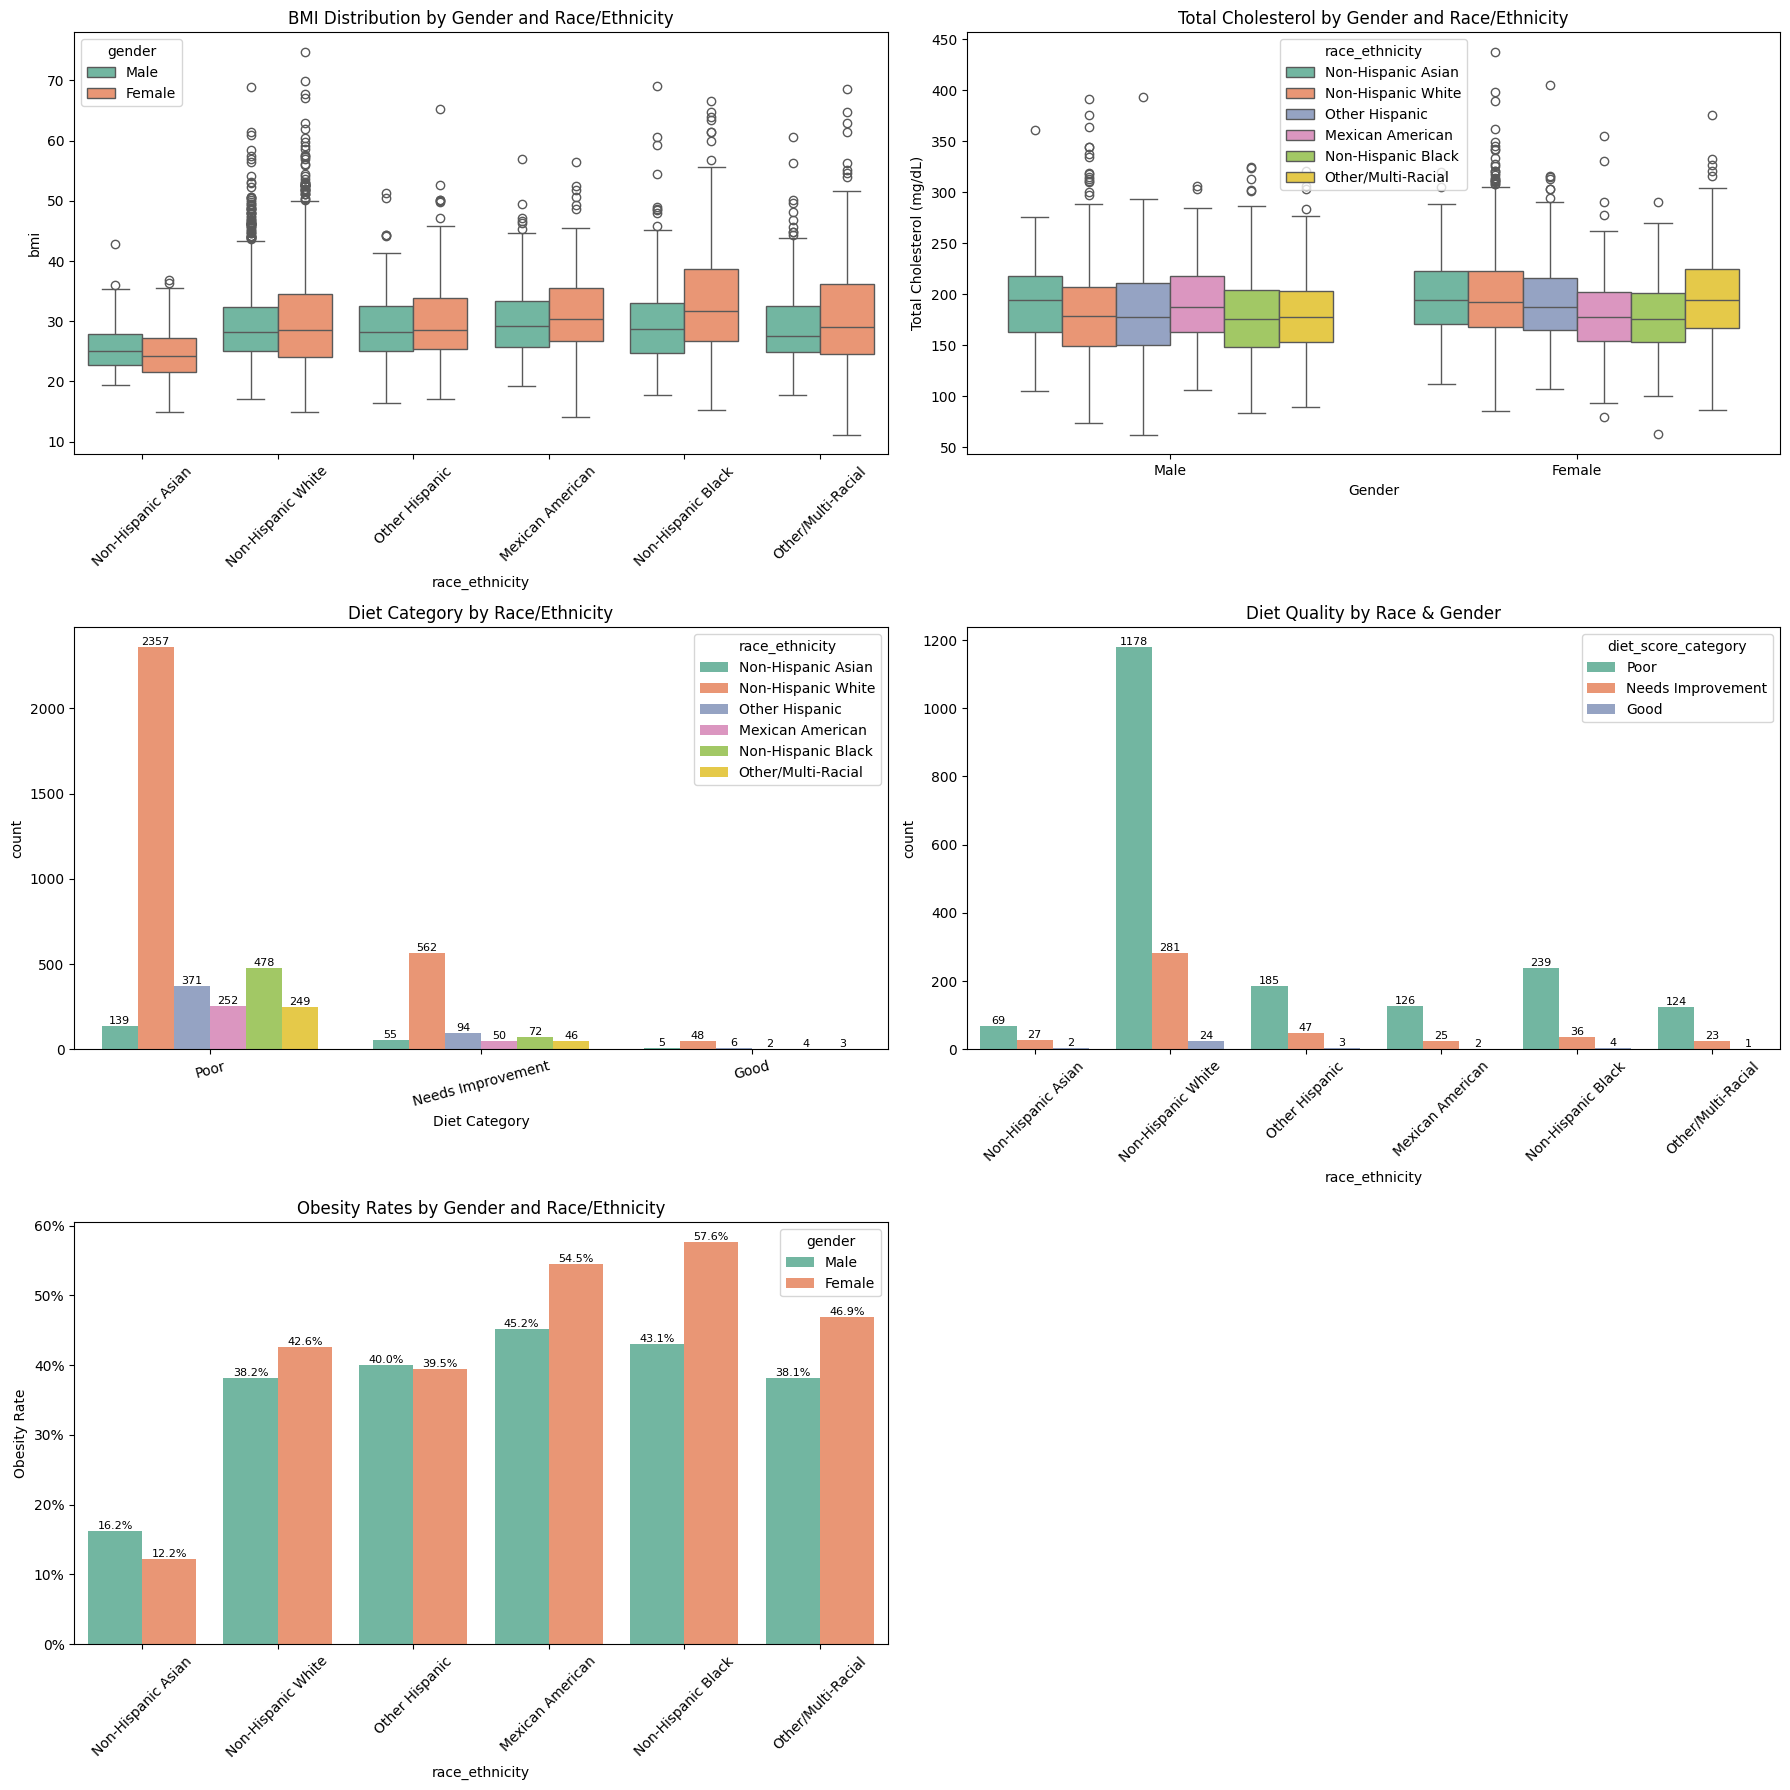

Distribution across gender and race subplots without weights saved to: outputs\plots\obj_2.1_distribution_across_gender_and_race_without_weight.png


In [4]:
# Step 1: Define the required columns
required_columns = [
    'gender', 'race_ethnicity', 'bmi', 'systolic_avg', 'diastolic_avg',
    'total_cholesterol', 'hei_score', 'diet_score_category', 'activity_level',
    'sleep_avg_hr', 'poverty_income_ratio', 'education_level',
    'has_health_insurance', 'obese'
]

# Step 2: Check for missing columns
missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    print("Missing columns in df:", missing_columns)
else:
    print("All required columns are present.")

# Step 3: Filter DataFrame
if not missing_columns:
    filtered_df = df[required_columns]

# Step 4: Summary Table
summary = filtered_df.groupby(['gender', 'race_ethnicity']).agg({
    'bmi': 'mean',
    'systolic_avg': 'mean',
    'diastolic_avg': 'mean',
    'total_cholesterol': 'mean',
    'hei_score': 'mean',
    'sleep_avg_hr': 'mean',
    'poverty_income_ratio': 'mean'
}).reset_index()
summary_path = SUMMARY_DIR / "obj_2.1_summary_by_gender_race_without_weight.csv" 
summary.to_csv(summary_path, index=False)
print(f"Distribution across gender and race subplots without weights csv file saved to: {pretty_path(summary_path)}")

# Step 5: Plotting 
palette = 'Set2'
race_order = df['race_ethnicity'].dropna().unique()
gender_order = df['gender'].dropna().unique()
diet_order = df['diet_score_category'].dropna().unique()

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 18))
axes = axes.flatten()

# Plot 1: BMI Boxplot
sns.boxplot(data=df, x='race_ethnicity', y='bmi', hue='gender',
            ax=axes[0], order=race_order, hue_order=gender_order, palette=palette)
axes[0].set_title('BMI Distribution by Gender and Race/Ethnicity')
axes[0].tick_params(axis='x', rotation=45)

# Plot 2: Cholesterol Boxplot
sns.boxplot(data=df, x='gender', y='total_cholesterol', hue='race_ethnicity',
            ax=axes[1], order=gender_order, hue_order=race_order, palette=palette)
axes[1].set_title('Total Cholesterol by Gender and Race/Ethnicity')
axes[1].set_ylabel('Total Cholesterol (mg/dL)')
axes[1].set_xlabel('Gender')

# Plot 3: Diet Category Countplot
sns.countplot(data=df, x='diet_score_category', hue='race_ethnicity',
              ax=axes[2], order=diet_order, hue_order=race_order, palette=palette)
axes[2].set_title('Diet Category by Race/Ethnicity')
axes[2].set_xlabel('Diet Category')
axes[2].tick_params(axis='x', rotation=15)

# Annotate bar values
for p in axes[2].patches:
    height = p.get_height()
    if height > 0:
        axes[2].annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                         ha='center', va='bottom', fontsize=8)

# Plot 4: Diet Quality Barplot
diet_counts = df.groupby(['gender', 'race_ethnicity', 'diet_score_category']).size().reset_index(name='count')
sns.barplot(data=diet_counts, x='race_ethnicity', y='count', hue='diet_score_category',
            ax=axes[3], order=race_order, hue_order=diet_order, errorbar=None, palette=palette)
axes[3].set_title('Diet Quality by Race & Gender')
axes[3].tick_params(axis='x', rotation=45)
for p in axes[3].patches:
    height = p.get_height()
    if height > 0:
        axes[3].annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                         ha='center', va='bottom', fontsize=8)

# Plot 5: Obesity Rate Barplot
obesity_rates = df.groupby(['gender', 'race_ethnicity'])['obese'].mean().reset_index()
sns.barplot(data=obesity_rates, x='race_ethnicity', y='obese', hue='gender',
            ax=axes[4], order=race_order, hue_order=gender_order, palette=palette)
axes[4].set_title('Obesity Rates by Gender and Race/Ethnicity')
axes[4].set_ylabel('Obesity Rate')
axes[4].yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
axes[4].tick_params(axis='x', rotation=45)
for p in axes[4].patches:
    height = p.get_height()
    if height > 0:
        axes[4].annotate(f'{height:.1%}', (p.get_x() + p.get_width() / 2., height),
                         ha='center', va='bottom', fontsize=8)

# Empty subplot (6th slot)
axes[5].axis('off')

# Finalize layout
plt.tight_layout()
subplot_path = PLOTS_DIR / "obj_2.1_distribution_across_gender_and_race_without_weight.png"
plt.savefig(subplot_path)
plt.show()
plt.close()

print(f"Distribution across gender and race subplots without weights saved to: {pretty_path(subplot_path)}")


#### b. Analysis with sample weight

***Calculating Weighted Health Averages by Gender and Race***

- First, I made sure the dataset includes all the columns I need, like gender, race, BMI, blood pressure, cholesterol, diet info, activity, sleep, income, education, health insurance, obesity, and the different sample weights. If any are missing, the code stops to avoid errors. Next, I mapped each health or lifestyle variable to the correct sample weight to make sure the averages I calculate reflect the population properly. For example, some diet-related variables use the diet weight, while things like education or gender use the interview sample weight. Then, I created a function to calculate weighted averages and confidence intervals by gender and race. This function groups the data by these categories, applies the correct weight, and returns the mean along with the range where the true average likely falls. I ran this weighted calculation for all the continuous variables like BMI, blood pressure, cholesterol, diet score, sleep hours, and income ratio. Finally, I saved these weighted summaries to a CSV file so we can review them later.

In [5]:

# Check required columns
required_columns = [
    'gender', 'race_ethnicity', 'bmi', 'systolic_avg', 'diastolic_avg',
    'total_cholesterol', 'hei_score', 'diet_score_category', 'total_diet_weight', 'activity_level',
    'sleep_avg_hr', 'poverty_income_ratio', 'education_level',
    'has_health_insurance', 'obese', 'exam_sample_weight', 'interview_sample_weight','blood_drawn_sample_weight'
]

missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    print("Missing columns in df:", missing_columns)
    raise ValueError("Missing columns, cannot proceed")
else:
    print("All required columns are present.")

variable_weight_map = {
    'bmi': 'exam_sample_weight',
    'systolic_avg': 'exam_sample_weight',
    'diastolic_avg': 'exam_sample_weight',
    'hei_score': 'total_diet_weight',
    'diet_score_category': 'total_diet_weight',
    'education_level': 'interview_sample_weight',
    'sleep_avg_hr': 'interview_sample_weight',
    'poverty_income_ratio': 'interview_sample_weight',
    'has_health_insurance': 'interview_sample_weight',
    'gender': 'interview_sample_weight',
    'race_ethnicity': 'interview_sample_weight',
    'total_cholesterol': 'blood_drawn_sample_weight'
}

def weighted_group_mean(df, group_cols, value_col, weight_col):
    results = []
    grouped = df.groupby(group_cols)
    for name, group in grouped:
        dsw = DescrStatsW(group[value_col], weights=group[weight_col], ddof=0)
        mean = dsw.mean
        ci_low, ci_upp = dsw.tconfint_mean()
        results.append((*name, value_col, mean, ci_low, ci_upp))
    return pd.DataFrame(results, columns=[*group_cols, 'variable', 'mean', 'ci_lower', 'ci_upper'])

cont_vars = [
    'bmi', 'systolic_avg', 'diastolic_avg', 'total_cholesterol',
    'hei_score', 'sleep_avg_hr', 'poverty_income_ratio'
]

for var in cont_vars:
    if var not in variable_weight_map:
        raise ValueError(f"Missing weight mapping for variable: {var}")
    
weighted_summaries = pd.concat([
    weighted_group_mean(
        df.dropna(subset=[var, variable_weight_map[var]]),
        ['gender', 'race_ethnicity'],
        var,
        variable_weight_map[var]
    )
    for var in cont_vars
])

weighted_summaries.to_csv(
    SUMMARY_DIR / "obj_2.1_weighted_summary_by_gender_race_with_weight.csv", index=False
)

def weighted_crosstab(df, group_col, cat_col, weight_col):
    weighted_counts = df.groupby([group_col, cat_col])[weight_col].sum().unstack(fill_value=0)
    weighted_props = weighted_counts.div(weighted_counts.sum(axis=1), axis=0)
    return weighted_counts, weighted_props



All required columns are present.


#### Visualization using Matplotlib

***Weighted Health and Lifestyle Distributions by Gender and Race/Ethnicity - using Matplotlib***

These charts show important health and lifestyle factors like body weight, cholesterol, diet, activity, sleep, education, and health insurance. The data is adjusted to better represent the whole population. We look at how these factors vary between different genders and racial or ethnic groups. This helps us understand who might be doing well and who may need more support when it comes to health and lifestyle.

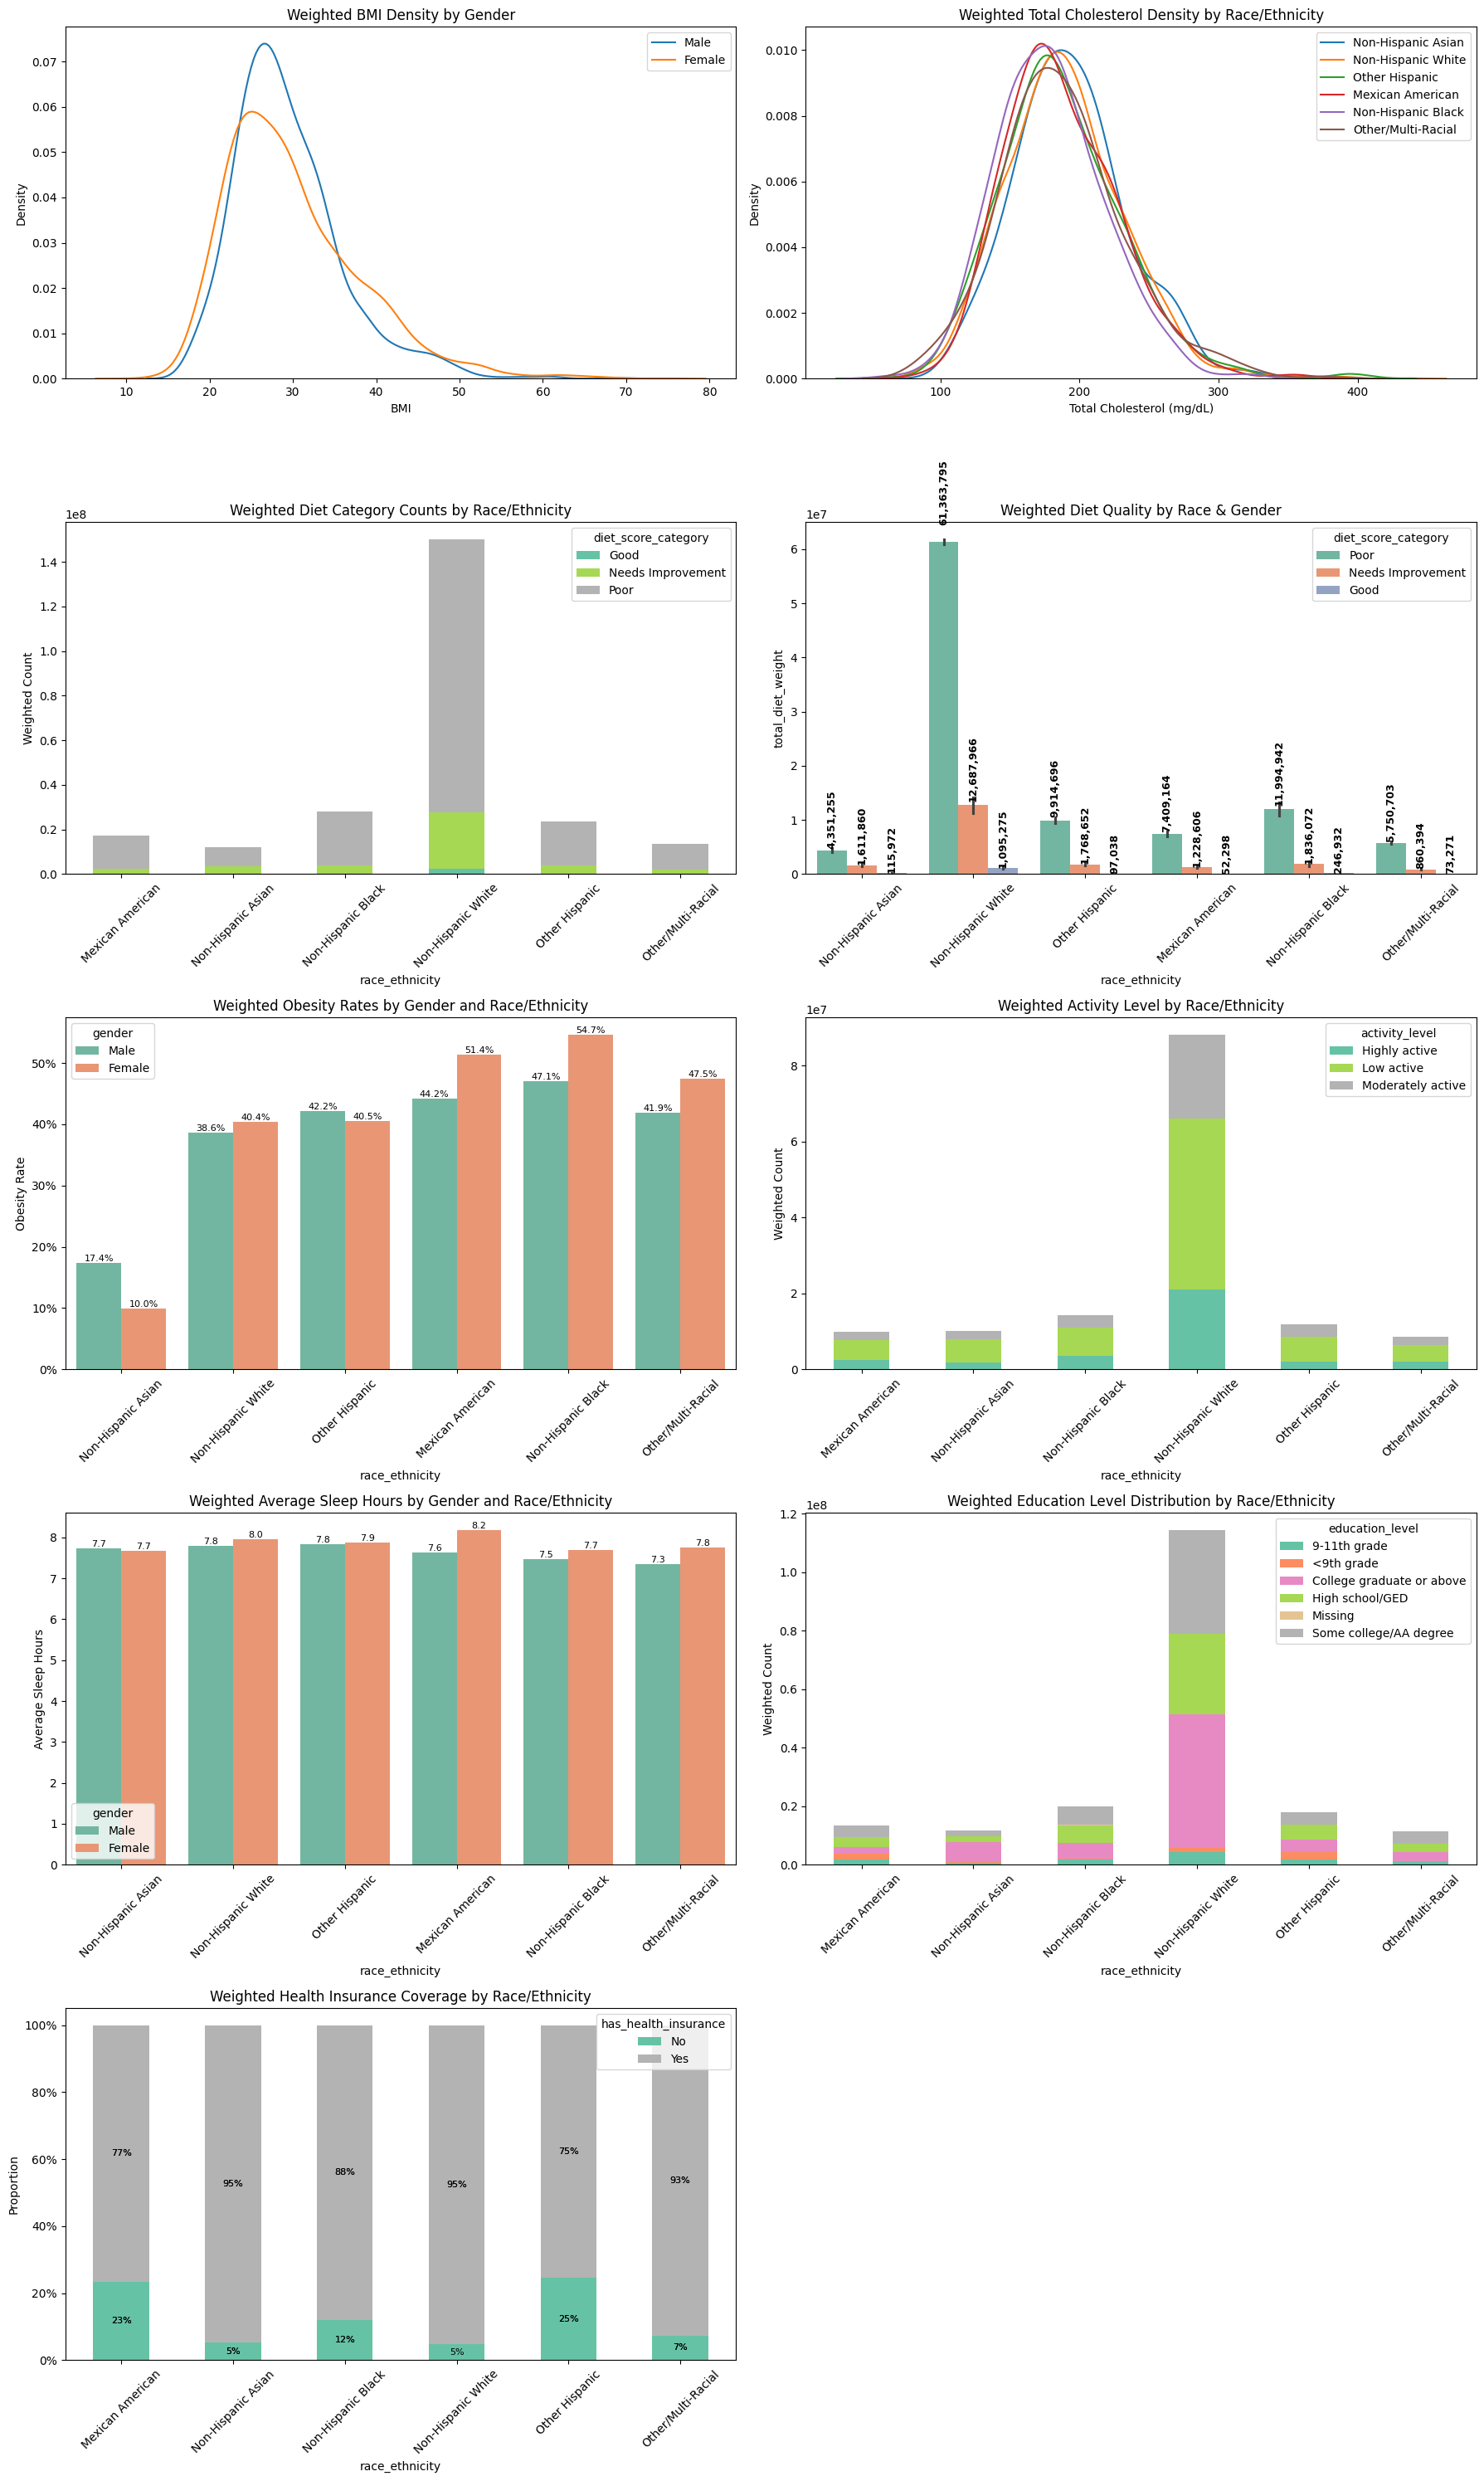

All weighted plots using matplotlib saved to: outputs\plots\obj_2.1_weighted_distribution_across_gender_and_race.png


In [6]:
palette = 'Set2'
race_order = df['race_ethnicity'].dropna().unique()
gender_order = df['gender'].dropna().unique()
diet_order = df['diet_score_category'].dropna().unique()
activity_order = df['activity_level'].dropna().unique()
education_order = df['education_level'].dropna().unique()
insurance_order = df['has_health_insurance'].dropna().unique()

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(18, 30))
axes = axes.flatten()

# Plot 1: Weighted BMI Density Plot by Gender
for gender in gender_order:
    sub = df[df['gender'] == gender].dropna(subset=['bmi', 'exam_sample_weight'])
    sns.kdeplot(data=sub, x='bmi', weights=sub['exam_sample_weight'], label=gender, ax=axes[0])
axes[0].set_title('Weighted BMI Density by Gender')
axes[0].set_xlabel('BMI')
axes[0].legend()

# Plot 2: Weighted Total Cholesterol Density Plot by Race/Ethnicity
for race in race_order:
    sub = df[df['race_ethnicity'] == race].dropna(subset=['total_cholesterol', 'blood_drawn_sample_weight'])
    sns.kdeplot(data=sub, x='total_cholesterol', weights=sub['blood_drawn_sample_weight'], label=race, ax=axes[1])
axes[1].set_title('Weighted Total Cholesterol Density by Race/Ethnicity')
axes[1].set_xlabel('Total Cholesterol (mg/dL)')
axes[1].legend()

# Plot 3: Weighted Diet Category Counts by Race/Ethnicity
diet_df = df.dropna(subset=['diet_score_category', 'race_ethnicity', 'total_diet_weight'])
diet_counts, diet_props = weighted_crosstab(diet_df, 'race_ethnicity', 'diet_score_category', 'total_diet_weight')
diet_counts.plot(kind='bar', stacked=True, colormap=palette, ax=axes[2])
axes[2].set_title('Weighted Diet Category Counts by Race/Ethnicity')
axes[2].set_ylabel('Weighted Count')
axes[2].tick_params(axis='x', rotation=45)

# Plot 4: Weighted Diet Quality by Race & Gender
diet_gender_df = df.dropna(subset=['gender', 'race_ethnicity', 'diet_score_category', 'total_diet_weight'])
diet_gender_counts = diet_gender_df.groupby(['gender', 'race_ethnicity', 'diet_score_category'])['total_diet_weight'].sum().reset_index()
sns.barplot(
    data=diet_gender_counts,
    x='race_ethnicity', y='total_diet_weight', hue='diet_score_category',
    order=race_order, hue_order=diet_order, palette=palette, ax=axes[3]
)
axes[3].set_title('Weighted Diet Quality by Race & Gender')
axes[3].tick_params(axis='x', rotation=45)

for p in axes[3].patches:
    height = p.get_height()
    if height > 0:
        axes[3].annotate(
            f'{height:,.0f}',
            (p.get_x() + p.get_width() / 2., height + 0.05 * height),
            ha='center',
            va='bottom',
            fontsize=9,             
            fontweight='bold',      
            rotation=90             
        )

# Plot 5: Weighted Obesity Rates by Gender and Race/Ethnicity
obesity_df = df.dropna(subset=['obese', 'gender', 'race_ethnicity', 'exam_sample_weight'])
obesity_rates = []
for name, group in obesity_df.groupby(['gender', 'race_ethnicity']):
    dsw = DescrStatsW(group['obese'], weights=group['exam_sample_weight'], ddof=0)
    obesity_rates.append((*name, dsw.mean))
obesity_rates_df = pd.DataFrame(obesity_rates, columns=['gender', 'race_ethnicity', 'obesity_rate'])
sns.barplot(
    data=obesity_rates_df,
    x='race_ethnicity', y='obesity_rate', hue='gender',
    order=race_order, hue_order=gender_order, palette=palette, ax=axes[4]
)
axes[4].set_title('Weighted Obesity Rates by Gender and Race/Ethnicity')
axes[4].set_ylabel('Obesity Rate')
axes[4].yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
axes[4].tick_params(axis='x', rotation=45)
for p in axes[4].patches:
    height = p.get_height()
    if height > 0:
        axes[4].annotate(
            f'{height:.1%}', (p.get_x() + p.get_width() / 2., height),
            ha='center', va='bottom', fontsize=8
        )

# Plot 6: Weighted Physical Activity Level by Race/Ethnicity
activity_df = df.dropna(subset=['activity_level', 'race_ethnicity', 'interview_sample_weight'])
activity_counts = activity_df.groupby(['race_ethnicity', 'activity_level'])['interview_sample_weight'].sum().unstack(fill_value=0)
activity_counts.plot(kind='bar', stacked=True, colormap=palette, ax=axes[5])
axes[5].set_title('Weighted Activity Level by Race/Ethnicity')
axes[5].set_ylabel('Weighted Count')
axes[5].tick_params(axis='x', rotation=45)

# Plot 7: Weighted Average Sleep Hours by Gender and Race/Ethnicity with CI error bars
sleep_df = df.dropna(subset=['sleep_avg_hr', 'gender', 'race_ethnicity', 'interview_sample_weight'])
sleep_stats = []
for name, group in sleep_df.groupby(['gender', 'race_ethnicity']):
    dsw = DescrStatsW(group['sleep_avg_hr'], weights=group['interview_sample_weight'], ddof=0)
    mean = dsw.mean
    ci_low, ci_upp = dsw.tconfint_mean()
    ci = ci_upp - mean  # or: (ci_upp - ci_low) / 2
    sleep_stats.append((*name, mean, ci))
sleep_stats_df = pd.DataFrame(sleep_stats, columns=['gender', 'race_ethnicity', 'mean_sleep', 'ci'])

sns.barplot(
    data=sleep_stats_df,
    x='race_ethnicity', y='mean_sleep', hue='gender',
    order=race_order, hue_order=gender_order, palette=palette,
    ax=axes[6], errorbar=None  # turn off default error bars
)
for p in axes[6].patches:
    height = p.get_height()
    if height > 0:
        axes[6].annotate(
            f'{height:.1f}',  # one decimal
            (p.get_x() + p.get_width() / 2., height),
            ha='center', va='bottom', fontsize=8
        )

axes[6].set_title('Weighted Average Sleep Hours by Gender and Race/Ethnicity')
axes[6].set_ylabel('Average Sleep Hours')
axes[6].tick_params(axis='x', rotation=45)


# Plot 8: Weighted Education Level Distribution by Race/Ethnicity
education_df = df.dropna(subset=['education_level', 'race_ethnicity', 'interview_sample_weight'])
education_counts = education_df.groupby(['race_ethnicity', 'education_level'])['interview_sample_weight'].sum().unstack(fill_value=0)
education_counts.plot(kind='bar', stacked=True, colormap=palette, ax=axes[7])
axes[7].set_title('Weighted Education Level Distribution by Race/Ethnicity')
axes[7].set_ylabel('Weighted Count')
axes[7].tick_params(axis='x', rotation=45)

# Plot 9: Weighted Health Insurance Coverage by Race/Ethnicity
insurance_df = df.dropna(subset=['has_health_insurance', 'race_ethnicity', 'interview_sample_weight'])
# Define all expected race and insurance categories
all_races = insurance_df['race_ethnicity'].unique()
insurance_categories = ['Yes', 'No']

# Create full index (all combinations of race and insurance)
full_index = pd.MultiIndex.from_product(
    [all_races, insurance_categories],
    names=['race_ethnicity', 'has_health_insurance']
)

# Group and reindex to include all combinations (fill missing with 0)
insurance_counts = (
    insurance_df
    .groupby(['race_ethnicity', 'has_health_insurance'])['interview_sample_weight']
    .sum()
    .reindex(full_index, fill_value=0)
    .unstack()
)

# Normalize to get proportions
insurance_props = insurance_counts.div(insurance_counts.sum(axis=1), axis=0)

# Plot
insurance_props.plot(kind='bar', stacked=True, colormap=palette, ax=axes[8])
axes[8].set_title("Health Insurance by Race/Ethnicity")
axes[8].set_ylabel("Proportion")

# Add percentage labels
for container in axes[8].containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            axes[8].annotate(
                f'{height:.0%}',
                (bar.get_x() + bar.get_width() / 2., bar.get_y() + height / 2.),
                ha='center', va='center', fontsize=8, color='black'
            )


# Set axis label/title if needed
axes[8].set_ylabel('Proportion')
axes[8].set_title('Health Insurance by Race/Ethnicity')


# Add percentage labels to each stacked bar
for container in axes[8].containers:
    for bar in container:
        height = bar.get_height()
        if height > 0.05:  # Skip tiny labels
            axes[8].annotate(
                f'{height:.0%}',
                (bar.get_x() + bar.get_width() / 2., bar.get_y() + height / 2.),
                ha='center', va='center', fontsize=8, color='black'
            )

axes[8].set_title('Weighted Health Insurance Coverage by Race/Ethnicity')
axes[8].set_ylabel('Proportion')
axes[8].tick_params(axis='x', rotation=45)
axes[8].yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# Empty last plot (9th plot slot for 5x2 grid)
axes[9].axis('off')

plt.tight_layout()
plot_path = PLOTS_DIR / "obj_2.1_weighted_distribution_across_gender_and_race.png"
plt.savefig(plot_path, dpi=300)

plt.show()

print(f"All weighted plots using matplotlib saved to: {pretty_path(plot_path)}")


#### Visualization using plotly - Weighted sample

***Weighted Health and Lifestyle Distributions by Gender and Race/Ethnicity - using plotly***

These graphs show how things like weight, cholesterol, diet, activity, sleep, education, and health insurance differ between men and women and across different races and ethnic groups. The data is adjusted to make sure it fairly represents everyone. You can look at the charts to see which groups have higher or lower rates of obesity, different diet habits, how much they sleep, and if they have health insurance. It helps us understand the health differences in the community.

In [7]:

# Helper function to convert weighted crosstab to tidy format
def weighted_crosstab_to_long(df, index_col, column_col, weight_col):
    ctab = df.groupby([index_col, column_col])[weight_col].sum().unstack(fill_value=0)
    ctab = ctab.reset_index()
    long_df = ctab.melt(id_vars=index_col, var_name=column_col, value_name='weighted_count')
    return long_df

# Common plot height
plot_height = 600

# Plot 1: Weighted BMI Density by Gender - Plotly does not support weighted KDE directly,
# so I approximate by plotting weighted histograms normalized to density.

fig1 = go.Figure()
for gender in gender_order:
    sub = df[df['gender'] == gender].dropna(subset=['bmi', 'exam_sample_weight'])
    weights = sub['exam_sample_weight']
    values = sub['bmi']
    hist, bin_edges = np.histogram(values, bins=50, weights=weights, density=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    fig1.add_trace(go.Scatter(x=bin_centers, y=hist, mode='lines', name=gender))

fig1.update_layout(
    title='Weighted BMI Density by Gender (Approx.)',
    xaxis_title='BMI',
    yaxis_title='Density',
    height=plot_height
)

fig1.show()

# Plot 2: Weighted Total Cholesterol Density by Race/Ethnicity 
fig2 = go.Figure()
for race in race_order:
    sub = df[df['race_ethnicity'] == race].dropna(subset=['total_cholesterol', 'blood_drawn_sample_weight'])
    weights = sub['blood_drawn_sample_weight']
    values = sub['total_cholesterol']
    hist, bin_edges = np.histogram(values, bins=50, weights=weights, density=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    fig2.add_trace(go.Scatter(x=bin_centers, y=hist, mode='lines', name=race))

fig2.update_layout(
    title='Weighted Total Cholesterol Density by Race/Ethnicity (Approx.)',
    xaxis_title='Total Cholesterol (mg/dL)',
    yaxis_title='Density',
    height=plot_height
)

fig2.show()

# Plot 3: Weighted Diet Category Counts by Race/Ethnicity
diet_df = df.dropna(subset=['diet_score_category', 'race_ethnicity', 'total_diet_weight'])
diet_long = weighted_crosstab_to_long(diet_df, 'race_ethnicity', 'diet_score_category', 'total_diet_weight')

fig3 = px.bar(
    diet_long,
    x='race_ethnicity',
    y='weighted_count',
    color='diet_score_category',
    title='Weighted Diet Category Counts by Race/Ethnicity',
    labels={'weighted_count': 'Weighted Count', 'race_ethnicity': 'Race/Ethnicity', 'diet_score_category': 'Diet Category'},
    hover_data={'weighted_count': ':,.0f'}
)
fig3.update_layout(barmode='stack', xaxis_tickangle=-45, height=plot_height)
fig3.show()

# Plot 4: Weighted Diet Quality by Race & Gender
diet_gender_df = df.dropna(subset=['gender', 'race_ethnicity', 'diet_score_category', 'total_diet_weight'])
diet_gender_counts = diet_gender_df.groupby(['gender', 'race_ethnicity', 'diet_score_category'])['total_diet_weight'].sum().reset_index()

fig4 = px.bar(
    diet_gender_counts,
    x='race_ethnicity',
    y='total_diet_weight',
    color='diet_score_category',
    facet_col='gender',
    category_orders={'race_ethnicity': race_order, 'diet_score_category': diet_order, 'gender': gender_order},
    title='Weighted Diet Quality by Race & Gender',
    labels={'total_diet_weight': 'Weighted Count', 'race_ethnicity': 'Race/Ethnicity', 'diet_score_category': 'Diet Category'},
    hover_data={'total_diet_weight': ':,.0f'}
)
fig4.update_layout(xaxis_tickangle=-45, height=plot_height)
fig4.show()

# Plot 5: Weighted Obesity Rates by Gender and Race/Ethnicity
obesity_df = df.dropna(subset=['obese', 'gender', 'race_ethnicity', 'exam_sample_weight'])
obesity_rates = []
for name, group in obesity_df.groupby(['gender', 'race_ethnicity']):
    dsw = DescrStatsW(group['obese'], weights=group['exam_sample_weight'], ddof=0)
    obesity_rates.append((*name, dsw.mean))
obesity_rates_df = pd.DataFrame(obesity_rates, columns=['gender', 'race_ethnicity', 'obesity_rate'])

fig5 = px.bar(
    obesity_rates_df,
    x='race_ethnicity',
    y='obesity_rate',
    color='gender',
    title='Weighted Obesity Rates by Gender and Race/Ethnicity',
    labels={'obesity_rate': 'Obesity Rate', 'race_ethnicity': 'Race/Ethnicity', 'gender': 'Gender'},
    hover_data={'obesity_rate': ':.1%'}
)
fig5.update_layout(barmode='group', xaxis_tickangle=-45, height=plot_height, yaxis_tickformat=',.0%')
fig5.show()

# Plot 6: Weighted Physical Activity Level by Race/Ethnicity
activity_df = df.dropna(subset=['activity_level', 'race_ethnicity', 'exam_sample_weight'])
activity_long = weighted_crosstab_to_long(activity_df, 'race_ethnicity', 'activity_level', 'exam_sample_weight')

fig6 = px.bar(
    activity_long,
    x='race_ethnicity',
    y='weighted_count',
    color='activity_level',
    title='Weighted Activity Level by Race/Ethnicity',
    labels={'weighted_count': 'Weighted Count', 'race_ethnicity': 'Race/Ethnicity', 'activity_level': 'Activity Level'},
    hover_data={'weighted_count': ':,.0f'}
)
fig6.update_layout(barmode='stack', xaxis_tickangle=-45, height=plot_height)
fig6.show()

# Plot 7: Weighted Average Sleep Hours by Gender and Race/Ethnicity with CI error bars
sleep_df = df.dropna(subset=['sleep_avg_hr', 'gender', 'race_ethnicity', 'interview_sample_weight'])
sleep_stats = []
for name, group in sleep_df.groupby(['gender', 'race_ethnicity']):
    dsw = DescrStatsW(group['sleep_avg_hr'], weights=group['interview_sample_weight'], ddof=0)
    mean = dsw.mean
    ci_low, ci_upp = dsw.tconfint_mean()
    ci = ci_upp - mean
    sleep_stats.append((*name, mean, ci))
sleep_stats_df = pd.DataFrame(sleep_stats, columns=['gender', 'race_ethnicity', 'mean_sleep', 'ci'])

fig7 = go.Figure()
for gender in gender_order:
    sub = sleep_stats_df[sleep_stats_df['gender'] == gender]
    fig7.add_trace(go.Bar(
        x=sub['race_ethnicity'],
        y=sub['mean_sleep'],
        name=gender,
        error_y=dict(type='data', array=sub['ci'], visible=True)
    ))

fig7.update_layout(
    title='Weighted Average Sleep Hours by Gender and Race/Ethnicity',
    xaxis_title='Race/Ethnicity',
    yaxis_title='Average Sleep Hours',
    barmode='group',
    xaxis_tickangle=-45,
    height=plot_height
)
fig7.show()

# Plot 8: Weighted Education Level Distribution by Race/Ethnicity
education_df = df.dropna(subset=['education_level', 'race_ethnicity', 'interview_sample_weight'])
education_long = weighted_crosstab_to_long(education_df, 'race_ethnicity', 'education_level', 'interview_sample_weight')

fig8 = px.bar(
    education_long,
    x='race_ethnicity',
    y='weighted_count',
    color='education_level',
    title='Weighted Education Level Distribution by Race/Ethnicity',
    labels={'weighted_count': 'Weighted Count', 'race_ethnicity': 'Race/Ethnicity', 'education_level': 'Education Level'},
    hover_data={'weighted_count': ':,.0f'}
)
fig8.update_layout(barmode='stack', xaxis_tickangle=-45, height=plot_height)
fig8.show()

# Plot 9: Weighted Health Insurance Coverage by Race/Ethnicity
insurance_df = df.dropna(subset=['has_health_insurance', 'race_ethnicity', 'interview_sample_weight'])
insurance_long = weighted_crosstab_to_long(insurance_df, 'race_ethnicity', 'has_health_insurance', 'interview_sample_weight')

fig9 = px.bar(
    insurance_long,
    x='race_ethnicity',
    y='weighted_count',
    color='has_health_insurance',
    title='Weighted Health Insurance Coverage by Race/Ethnicity',
    labels={'weighted_count': 'Weighted Count', 'race_ethnicity': 'Race/Ethnicity', 'has_health_insurance': 'Has Health Insurance'},
    hover_data={'weighted_count': ':,.0f'}
)
fig9.update_layout(barmode='stack', xaxis_tickangle=-45, height=plot_height)
fig9.show()

# combining all the plots in one figure

figs = [fig1, fig2, fig3, fig4, fig5, fig6, fig7, fig8, fig9]
plot_path = PLOTS_DIR/"obj_2.1_compare_distributions_across_gender_and_race_combined_plots.html"
# Save the combined HTML file to the desired path
with open(plot_path, "w") as f:
    for fig in figs:
        f.write(pio.to_html(fig, full_html=False, include_plotlyjs='cdn'))

print(f"All weighted plots using plotly saved to: {pretty_path(plot_path)}")

All weighted plots using plotly saved to: outputs\plots\obj_2.1_compare_distributions_across_gender_and_race_combined_plots.html


- View the obj_2.1_compare_distributions_across_gender_and_race_combined_plots.html interactive plot:  
[here](https://sahiladevi.github.io/health_track//outputs/plots/obj_2.1_compare_distributions_across_gender_and_race_combined_plots.html) 